In [70]:
%matplotlib inline

import numpy as np
import pandas as pd
from code.geo import *
import matplotlib.pyplot as plt

In [2]:

citycenter = (37.77, -122.454)
print 'SEDAC res: 2.5 arcmin = ', 2.5/60, 'degrees'

d = 16000
print 'in distance: %d feet = %6.4f degrees = %3.2f miles' % (d, distance_to_angle(citycenter, d, 0)[0], d/5280.)

d = 500
print 'walkscore res: %d feet = %6.4f degrees = %3.2f miles' % (d, distance_to_angle(citycenter, d, 0)[0], d/5280.)

SEDAC res: 2.5 arcmin =  0.0416666666667 degrees
in distance: 16000 feet = 0.0439 degrees = 3.03 miles
walkscore res: 500 feet = 0.0014 degrees = 0.09 miles


(100, 6)


,nodex,nodey,f1,f2,f3,f4
0,1,1,0,1,0,0
1,2,1,0,1,0,0
2,3,1,0,1,0,0
3,4,1,0,1,0,0
4,5,1,0,1,0,0


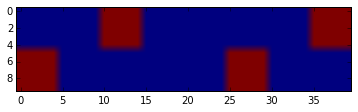

In [73]:
coords = np.arange(1, 11)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

gdf['f1'] = np.r_[np.tile(np.repeat([0,1], [5,5]), 5), np.zeros(50)]
gdf['f2'] = np.r_[np.tile(np.repeat([1,0], [5,5]), 5), np.zeros(50)]
gdf['f3'] = np.r_[np.zeros(50), np.tile(np.repeat([0,1], [5,5]), 5)]
gdf['f4'] = np.r_[np.zeros(50), np.tile(np.repeat([1,0], [5,5]), 5)]

print gdf.shape
plt.imshow(pd.pivot_table(gdf, index='nodex', columns='nodey'))
gdf.head()


In [64]:
np.r_[np.tile(np.repeat([0,1], [5,5]), 5), np.zeros(50)]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [9]:
def find_neib(x, y):
    neibs = [[x + 1, y],
             [x - 1, y],
             [x, y + 1],
             [x, y - 1]]
    return np.array(neibs)
find_neib(2, 2)

array([[3, 2],
       [1, 2],
       [2, 3],
       [2, 1]])

In [75]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'neibx', 'neiby']

print edges.shape
edges.head()

(400, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1


In [110]:
# drop non-existent points
edges = edges[edges.neibx.apply(lambda x: x in coords)]
edges = edges[edges.neiby.apply(lambda x: x in coords)]
edges.index = np.arange(0, edges.shape[0])
print edges.shape
edges.head()

(360, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,1,2
2,2,1,3,1
3,2,1,1,1
4,2,1,2,2


In [99]:
def dist(x1, y1, x2, y2, features):
    f1 = features[(features.nodex == x1) & (features.nodey == y1)].iloc[:,2:]
    f2 = features[(features.nodex == x2) & (features.nodey == y2)].iloc[:,2:]
    
    f1 = np.array(f1).flatten()
    f2 = np.array(f2).flatten()
    return np.linalg.norm(f1-f2)

print dist(1, 1, 2, 1, gdf)
print dist(1, 1, 1, 6, gdf)
    

0.0
1.41421356237


In [112]:
distances = edges.apply(lambda x: dist(x.nodex, x.nodey, x.neibx, x.neiby, gdf), axis=1)
edges[distances != 0]

,nodex,nodey,neibx,neiby
11,5,1,6,1
15,6,1,5,1
43,5,2,6,2
48,6,2,5,2
81,5,3,6,3
86,6,3,5,3
119,5,4,6,4
124,6,4,5,4
143,1,5,1,6
147,2,5,2,6


# single feature, 4 valued

(144, 3)


,nodex,nodey,f1
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,1,0


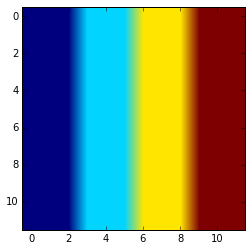

In [116]:
coords = np.arange(1, 13)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

gdf['f1'] = np.repeat([0, 1, 2, 3], [36, 36, 36, 36])


print gdf.shape
plt.imshow(pd.pivot_table(gdf, index='nodex', columns='nodey'))
gdf.head()

In [117]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'neibx', 'neiby']

print edges.shape
edges.head()

(576, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1


In [118]:
# drop non-existent points
edges = edges[edges.neibx.apply(lambda x: x in coords)]
edges = edges[edges.neiby.apply(lambda x: x in coords)]
edges.index = np.arange(0, edges.shape[0])
print edges.shape
edges.head()

(528, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,1,2
2,2,1,3,1
3,2,1,1,1
4,2,1,2,2


In [120]:
edges['distances'] = edges.apply(lambda x: dist(x.nodex, x.nodey, x.neibx, x.neiby, gdf), axis=1)
edges[edges.distances != 0]

,nodex,nodey,neibx,neiby,distances
81,1,3,1,4,1
85,2,3,2,4,1
89,3,3,3,4,1
93,4,3,4,4,1
97,5,3,5,4,1
101,6,3,6,4,1
105,7,3,7,4,1
109,8,3,8,4,1
113,9,3,9,4,1
117,10,3,10,4,1
